<a href="https://colab.research.google.com/github/Julianfried/Diplomatura-en-IA-Instituto-Humai/blob/main/Analisis%20de%20Datos/Pivot_tables_y_joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/2_Pivot_Table_y_Joins/clase-2-ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>


# Ejercicios Pandas II

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Parámetros y extracción de datos

In [ ]:
ESTIMACIONES_URL = "http://datos.agroindustria.gob.ar/dataset/9e1e77ba-267e-4eaa-a59f-3296e86b5f36/resource/95d066e6-8a0f-4a80-b59d-6f28f88eacd5/download/estimaciones-agricolas-al-30-09-2019.csv"
ESTIMACIONES_URL_S3 = "https://datasets-humai.s3.amazonaws.com/datasets/estimaciones_agricolas.zip"
ESTIMACIONES_PATH = "data/estimaciones-agricolas.csv"

In [ ]:
converters = {
    "id_provincia": lambda x: str(x).zfill(2),
    "id_departamento": lambda x: str(x).zfill(3),
}

#estimaciones = pd.read_csv(ESTIMACIONES_URL, encoding="latin1", converters=converters)estimaciones = pd.read_csv(ESTIMACIONES_URL, encoding="latin1", converters=converters)
estimaciones = pd.read_csv(ESTIMACIONES_URL_S3, encoding="utf8", converters=converters)
#estimaciones.to_csv(ESTIMACIONES_PATH, encoding="utf8", index=False)
#estimaciones = pd.read_csv(ESTIMACIONES_PATH, converters=converters)

In [ ]:
estimaciones.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
0,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3,3,10,3333
1,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/1971,1,1,3,3000
2,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15,15,82,5467
3,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/1971,10,10,55,5500
4,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/1972,8,8,44,5500


## Ejercicio 1 

Explorar descriptivamente el dataset de estimaciones agrícolas (https://datos.gob.ar/dataset/agroindustria-agricultura---estimaciones-agricolas) usando los elementos aprendidos en la clase 2, respondiendo las siguientes preguntas o mostrando:

* ¿Cuál es la producción total en toneladas estimada de todos los cultivos en la Argentina, cada año?
* ¿Cómo se distribuye el rendimiento (kg por hectárea) estimado promedio del cultivo de soja entre los departamentos que la siembran? ¿Qué tipo de distribución probabilística tiene? ¿Cuál es (y en qué departamento está) el rendimiento mínimo, mediano y máximo? ¿Cuál es el rendimiento promedio? ¿Hay valores potencialmente anómalos?
* ¿Cómo se distribuye la superficie sembrada de Papa? ¿Es una distribución probabilística similar a la de la soja? ¿El rendimiento en kg producidos por hectárea es similar entre los departamentos que la cultivan, se distribuye más o menos "equitativamente" que el de la soja? ¿Hay valores potencialmente anómalos?
* Generá una tabla donde cada cultivo sea una columna, cada fila un año (una campaña) y los valores sean la producción total.

In [ ]:
estimaciones.rename(columns = {'produccion ' : 'produccion'}, inplace = True)

In [ ]:
estimaciones.cultivo.unique()

array(['Ajo', 'Alpiste', 'Avena', 'Cártamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebada total', 'Cebolla total', 'Centeno',
       'Colza', 'Girasol', 'Limón', 'Lino', 'Maíz', 'Mandarina', 'Maní',
       'Mijo', 'Naranja', 'Papa total', 'Pomelo', 'Poroto seco',
       'Soja total', 'Sorgo', 'Trigo candeal', 'Trigo total', 'Algodón',
       'Jojoba', 'Arroz', 'Caña de azúcar', 'Banana', 'Té', 'Tung',
       'Yerba mate'], dtype=object)

In [ ]:
#¿Cuál es la producción total en toneladas estimada de todos los cultivos en la Argentina, cada año?
produccion_por_cultivo = estimaciones.pivot_table(
    index = ['cultivo'],
    values = ['produccion'],
    aggfunc = 'sum'
)
produccion_por_cultivo.sort_values('produccion', ascending=False)

,produccion
cultivo,
Soja total,1005027716
Maíz,763032201
Trigo total,565258144
Caña de azúcar,440313842
Sorgo,184282578
Girasol,153401444
Papa total,58956171
Cebada cervecera,54241899
Arroz,40177099


In [ ]:
estimaciones.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada ',
       'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')

In [ ]:
#¿Cómo se distribuye el rendimiento (kg por hectárea) estimado promedio del cultivo de soja entre los departamentos que la siembran? 
#¿Qué tipo de distribución probabilística tiene? 
#¿Cuál es (y en qué departamento está) el rendimiento mínimo, mediano y máximo? 
#¿Cuál es el rendimiento promedio? 
#¿Hay valores potencialmente anómalos?
rendimiento_por_departamento = estimaciones[estimaciones.cultivo == 'Soja total'].pivot_table(
    index = ['departamento'],
    values = ['rendimiento'],
)
rendimiento_por_departamento

,rendimiento
departamento,
1 DE MAYO,649.000000
12 DE OCTUBRE,1740.097561
2 DE ABRIL,1930.782609
25 DE MAYO,1852.650602
25 de Mayo,1622.829268
...,...
VICTORIA,2084.933333
VILLAGUAY,1752.400000
VILLARINO,1388.192308


<Axes: ylabel='Frequency'>

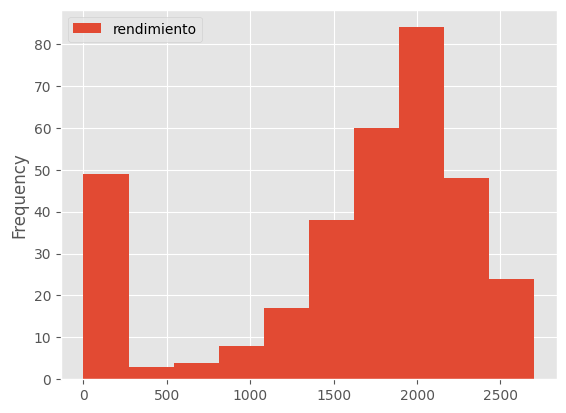

In [ ]:
rendimiento_por_departamento.plot.hist()

In [ ]:
rendimiento_por_departamento.max()

rendimiento    2703.571429
dtype: float64

In [ ]:
#¿Cómo se distribuye la superficie sembrada de Papa? ¿Es una distribución probabilística similar a la de la soja? 
#¿El rendimiento en kg producidos por hectárea es similar entre los departamentos que la cultivan, se distribuye más o menos "equitativamente" que el de la soja? 
#¿Hay valores potencialmente anómalos?
superficie_papa = estimaciones[estimaciones.cultivo == 'Papa total'].pivot_table(
    index = ['departamento'],
    values = ['sup_sembrada '],
    aggfunc = 'sum'
)
superficie_papa.sort_values('sup_sembrada ', ascending=False)

,sup_sembrada
departamento,
BALCARCE,680580
LOBERIA,271640
GENERAL ALVARADO,249419
GENERAL PUEYRREDON,240547
CAPITAL,222801
...,...
SANTO TOME,10
SUIPACHA,5
GUAMINI,5


<Axes: ylabel='Frequency'>

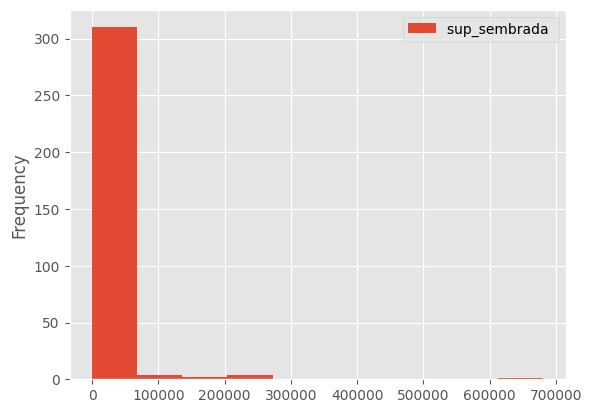

In [ ]:
superficie_papa.plot.hist()

In [ ]:
rendimiento_papa = estimaciones[estimaciones.cultivo == 'Papa total'].pivot_table(
    index = ['departamento'],
    values = ['rendimiento'],
)
rendimiento_papa.sort_values('rendimiento', ascending=False)

,rendimiento
departamento,
CORONEL SUAREZ,23868.000000
BALCARCE,23820.689655
GENERAL ALVARADO,23361.730769
TANDIL,23318.076923
LOBERIA,23239.807692
...,...
O'HIGGINS,3000.000000
TAPENAGA,2750.000000
FRAY JUSTO SANTA MARIA DE ORO,2000.000000


In [ ]:
rendimientos = rendimiento_papa.merge(
    rendimiento_por_departamento,
    left_on=['rendimiento', 'departamento'],
    right_on=['rendimiento', 'departamento']
)
rendimientos

,rendimiento
departamento,


In [ ]:
#Generá una tabla donde cada cultivo sea una columna, cada fila un año (una campaña) y los valores sean la producción total.
tabla = estimaciones.pivot_table(
    index = ['campaña'],
    columns = ['cultivo'],
    values = ['produccion']
)
tabla

produccion                                            \
cultivo            Ajo       Algodón      Alpiste          Arroz   
campaña                                                            
1969/1970   198.825911   4448.543689  1407.894737    6783.333333   
1970/1971   208.533898   2821.782178   553.521127    4800.000000   
1971/1972   213.218487   2864.705882   374.285714    5764.705882   
1972/1973   267.377451   4076.923077   514.705882    5416.666667   
1973/1974   332.442786   3984.761905   507.462687    6583.333333   
1974/1975   329.858537   5009.259259   403.174603    6622.641509   
1975/1976   346.085859   4238.095238   520.634921    5942.307692   
1976/1977   359.236453   4461.538462   600.000000    6530.612245   
1977/1978   433.516484   5956.060606   895.522388    5849.056604   
1978/1979   435.053763   4580.000000   698.630137    6240.000000   
1979/1980   524.486188   4257.894737   608.695652    5320.000000   
1980/1981   374.668478   2792.631579   567.741935    5726.000000   
1981/1982   234.037267   4910.000000   512.698413    8744.000000   
1982/1983   329.335616   3929.473684  1000.000000    6482.692308   
1983/1984   353.664336   5980.392157   847.457627    9419.607843   
1984/1985   257.661972   5643.157895   854.838710    8333.333333   
1985/1986   240.113636   3922.916667   373.015873    8951.020408   
1986/1987   344.595041   3470.967742  1008.771930    8244.444444   
1987/1988   295.016393   9133.333333   872.727273   63900.000000   
1988/1989  1947.058824   7038.068182  1352.272727   81666.666667   
1989/1990   537.733333  16192.105263  1161.224490   47566.666667   
1990/1991   936.253165  12732.258065  1834.782609    8690.000000   
1991/1992  1231.200000  10348.571429  1889.411765   17517.500000   
1992/1993  1092.385714   5818.756757  1007.333333   14836.585366   
1993/1994  1145.363636   9941.971831   886.884615   15190.000000   
1994/1995  1291.157895  13890.703704   613.972973   23155.000000   
1995/1996  1387.439394  17722.894737   610.241379   24650.000000   
1996/1997  1597.232877  13203.410256   925.037037   28693.809524   
1997/1998  1948.947368  12808.181818  1017.000000   24074.642857   
1998/1999          NaN   8125.552632   854.178571   39480.952381   
1999/2000          NaN   2067.722772   224.414141    9509.578947   
2000/2001          NaN   7174.718310   200.572917   14314.491803   
2001/2002          NaN   3161.724638   617.037037   20265.628571   
2002/2003          NaN   3053.106061   759.000000   19934.222222   
2003/2004          NaN   5127.565217   727.333333   27896.921053   
2004/2005          NaN   5977.533333   660.080000   25844.729730   
2005/2006          NaN   6054.652174   612.666667   32256.540541   
2006/2007          NaN   7791.171429   425.238095   30001.972222   
2007/2008          NaN   7096.130435   452.500000   35857.571429   
2008/2009          NaN   6041.812500   477.285714   37190.694444   
2009/2010          NaN  10321.958904   465.000000   34534.972222   
2010/2017          NaN  15411.119403  1192.217391   46002.000000   
2011/2012          NaN  13123.148148  1108.571429  104531.400000   
2012/2013          NaN  11081.795918   827.454545  104230.000000   
2013/2014          NaN  21242.791667  3115.882353  105454.000000   
2014/2015          NaN  16922.234043  1862.176471  103873.333333   
2015/2016          NaN  13198.921569  1965.266667   93665.333333   
2016/2017          NaN  12081.568627  2112.095238   88556.000000   
2017/2018          NaN  17312.595745  1237.666667   91197.866667   
2018/2019          NaN           NaN  2165.105263   38382.774194   

                                                                       \
cultivo           Avena        Banana Caña de azúcar Cebada cervecera   
campaña                                                                 
1969/1970   1421.404682   8937.600000   1.796296e+05      3727.611940   
1970/1971   1220.203390   8992.000000   2.052000e+05      2431.297710   
1971/1972   1637.931034  18394.117647   2.

In [ ]:
estimaciones.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada ',
       'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')